### Decision Tree Classifier

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn import metrics
from io import StringIO
from IPython.display import Image
from pydot import graph_from_dot_data
import pandas as pd 
import numpy as np 
from IPython.display import Image  
import pydotplus


In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns= iris.feature_names)
y = pd.Categorical.from_codes(iris.target,iris.target_names)

In [3]:
print(X.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [4]:
print(y)

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [5]:
y = pd.get_dummies(y)
print(y)

     setosa  versicolor  virginica
0      True       False      False
1      True       False      False
2      True       False      False
3      True       False      False
4      True       False      False
..      ...         ...        ...
145   False       False       True
146   False       False       True
147   False       False       True
148   False       False       True
149   False       False       True

[150 rows x 3 columns]


In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1)
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [7]:
print("Accuracy Score", metrics.accuracy_score(y_test,y_pred))

Accuracy Score 0.9736842105263158


### Confusion Matrix

In [8]:
species = np.array(y_test).argmax(axis =1)
prediction = np.array(y_pred).argmax(axis=1)
print(confusion_matrix(species,prediction))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


### Decision Tree

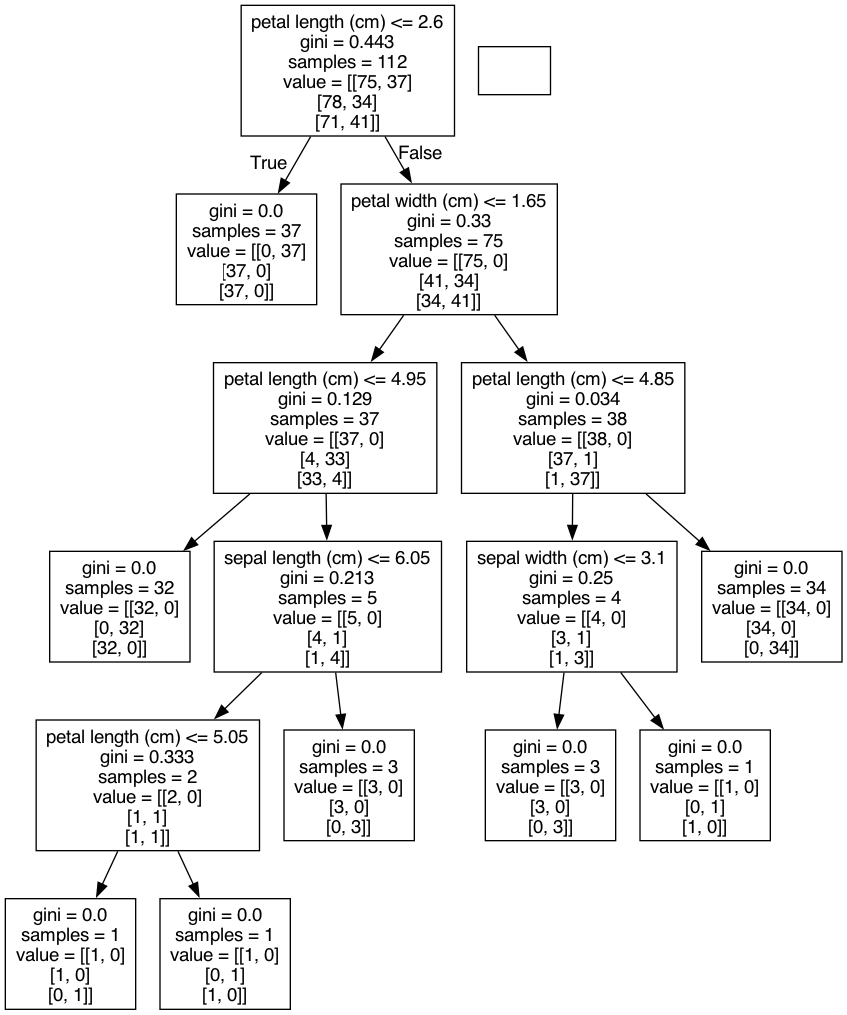

In [9]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=iris.feature_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Decision Tree')
Image(graph.create_png())